# Objectives

1. Implement the algorithms listed below in a programming language (python)
2. Establish the properties of the input data against which the analysis is performed
3. Choose metrics for comparing algorithms
4. Perform empirical analysis of the proposed algorithms
5. Make a graphical presentation of the data obtained
6. Make a conclusion on the work done

### Algorithms

Djikstra, Floyd-Warshall.


## Implementation


## Setup


In [20]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../shared')
from decorators import *
from benchmarking import *


### Generating the graphs


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import random
SEED = 42

rand = random.Random(SEED)

# 0.1 - sparse bidirectional graph, weight 1-100
def get_random_graph(n, density):
    G = nx.DiGraph()
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(n):
            if i != j and rand.random() < density:
                G.add_edge(i, j, weight=rand.randint(1, 100))
    return G

def get_random_sparse_graph(n):
    return get_random_graph(n, 0.1)

def get_random_medium_graph(n):
    return get_random_graph(n, 0.5)


### 1. Implement the algorithms listed below in a programming language (python)


The following implementation of Djikstra is not the most effective, as it uses performs a linear search to find the minimum distance vertex. I have created a heap data structure for lab 3, but by crippling the performance, Floyd-Warshall would stand a change in the comparison. These algorithms are not meant to be compared apples to apples anyway.


In [22]:
import networkx as nx

def dijkstra(graph: nx.DiGraph):
    distances = {}
    for node in graph.nodes:
        distances[node] = float('inf')
    distances[0] = 0
    
    visited = set()

    while len(visited) < len(graph):
        node = min((set(distances.keys()) - visited), key=distances.get)
        visited.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                new_distance = distances[node] + graph[node][neighbor]['weight']
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance

    return distances
    

def floyd_warshall(G: nx.DiGraph):
    dist = {i: {j: float('inf') for j in G.nodes()} for i in G.nodes()}
    for i in G.nodes():
        dist[i][i] = 0
    for i in G.nodes():
        for j in G.neighbors(i):
            dist[i][j] = G[i][j]['weight']
    for k in G.nodes():
        for i in G.nodes():
            for j in G.nodes():
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return dist

The 2 sets of inputs are going to be graphs with an exponentially increasing number of nodes, one set being sparse and another one being dense.

In [23]:
algorithms= [dijkstra, floyd_warshall]

def exponential_yielder(start: int, end: int, step: int) -> int:
    i = start
    while i < end:
        yield i
        i *= step

LIMIT = 1000

sparse_graphs = [get_random_sparse_graph(n) for n in exponential_yielder(10, LIMIT, 2)]
dense_graphs = [get_random_medium_graph(n) for n in exponential_yielder(10, LIMIT, 2)]


### 3. Choose metrics for comparing algorithms

The metric that will be used for comparing the algorithms is running time.


### 4. Perform empirical analysis of the proposed algorithms

The utility functions defined in the previous laboratories will be used to benchmark the running time of the algorithms.


In [24]:
results_sparse = benchmark_single_thread(algorithms, sparse_graphs)
results_dense = benchmark_single_thread(algorithms, dense_graphs)


In [34]:
# print table
import pandas as pd
columns=list(exponential_yielder(10, LIMIT, 2))

sparse_df = pd.DataFrame(results_sparse.values(), index=results_sparse.keys(), columns=columns)
dense_df = pd.DataFrame(results_dense.values(), index=results_dense.keys(), columns=columns)

print("Sparse")
print(sparse_df)

print("Dense")
print(dense_df)

Sparse
                   10      20       40        80        160        320  \
dijkstra        0.0583  0.0707   0.2120    0.7190    1.6686     6.4462   
floyd_warshall  0.4167  1.9721  13.1516  101.3685  833.4052  6320.5019   

                       640  
dijkstra           25.5711  
floyd_warshall  49637.3357  
Dense
                   10      20       40       80        160        320  \
dijkstra        0.0672  0.0949   0.3099   0.9835    3.4976    14.3348   
floyd_warshall  0.2832  1.7407  12.8944  97.7904  780.6867  6156.3712   

                       640  
dijkstra           54.2836  
floyd_warshall  48774.1159  


### 5. Make a graphical presentation of the data obtained

The following chart show the running time of each algorithm on the chosen graphs.

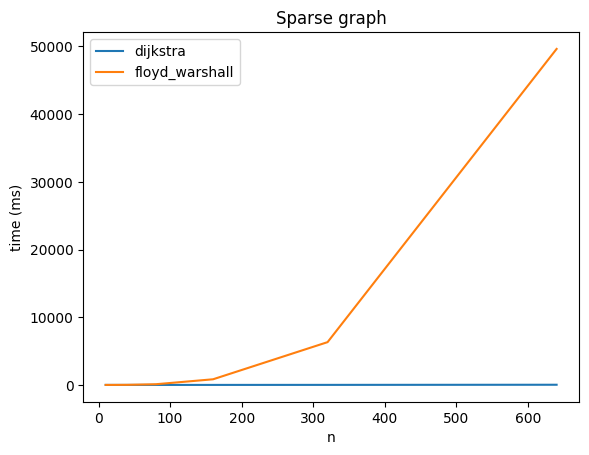

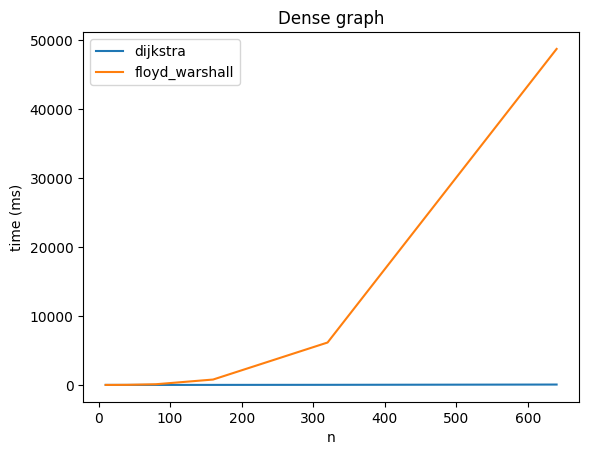

In [36]:
plot_results(results_sparse, columns, title="Sparse graph")
plot_results(results_dense, columns, title="Dense graph")

The rest of the source code can be accessed publicly on GitHub: [https://github.com/prenaissance/labs-2022](https://github.com/prenaissance/labs-2022) 

# Conclusion

In this laboratory work, I compared the efficiency of 2 shortest path algorithms at finding the shortest from 1 node to all the others.

The comparison is not a fair one, as Floyd Warshall algorithm is intended for being fast at calculating the shortest distance from any node to any node, but any other metrics for comparison would have resulted in the unfairness being reversed.

Djikstra has many advantages as a very efficient algorithm that is not hard to implement, but it must meet certain use cases. First of all, the restrictions, Djikstra cannot be used for graphs that have negative edges, as a negative loop would break the algorithm. Other algorithms, which might be slower, like Bellman algorithm, can deal with that.

Floyd Warshall has the advantage of calculating the shortest distance simulataniously of all the nodes from one another, and unlike Djikstra, it can handle negative edges without any modifications or loss of performance.

Overall, in spite of the graphs highly favoring Djikstra, both algorithms have their use cases. For weighted, positive valued graphs, Djikstra is the way to go, as it provides a very efficient solution. For use cases where each node's distance to the other nodes needs to be calculated, like a deterministic K-center problem, Floyd Warshall makes the most sense to use.